In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import joblib

import os

In [2]:
df = pd. read_csv('train.csv')

In [3]:
df.isna().sum(axis=0)/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [4]:
df = df.drop(['Cabin'],axis = 1)

In [5]:
df = df[df.Age.notna()]
df = df[df.Embarked.notna()]

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [7]:
vars_disc = ['Survived', 'Pclass','Sex','Age', 'SibSp','Parch', 
             'Ticket', 'Fare', 'Embarked']

for i in vars_disc:
    print(df[i].value_counts())

0    424
1    288
Name: Survived, dtype: int64
3    355
1    184
2    173
Name: Pclass, dtype: int64
male      453
female    259
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64
0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64
0    519
1    110
2     68
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
347082          7
CA 2144         6
347088          6
3101295         6
S.O.C. 14879    5
               ..
3101298         1
111320          1
PC 17590        1
349910          1
350036          1
Name: Ticket, Length: 541, dtype: int64
13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
82.1708     1
26.3875     1
25.5875     1
39.4000     1
10.5167     1
Name: Fare, Length: 219, dtype: int64
S    554
C    130
Q     28
Name: Embarked, dtype: int64


In [10]:
vars_cat = ['Pclass','Sex','Embarked']

#One Hot Encoding

for i in vars_cat:
    categorias = df[i].value_counts().index
    print(categorias)
    
    for k in categorias:
        name = 'is-'+str(i)+'-'+str(k)
        print(name)
        df[name] = np.where(df[i]==k,1,0)
    df = df.drop([i], axis = 1)

Int64Index([3, 1, 2], dtype='int64')
is-Pclass-3
is-Pclass-1
is-Pclass-2
Index(['male', 'female'], dtype='object')
is-Sex-male
is-Sex-female
Index(['S', 'C', 'Q'], dtype='object')
is-Embarked-S
is-Embarked-C
is-Embarked-Q


In [11]:
df['family_size'] = df['SibSp'] + df['Parch']

<AxesSubplot:>

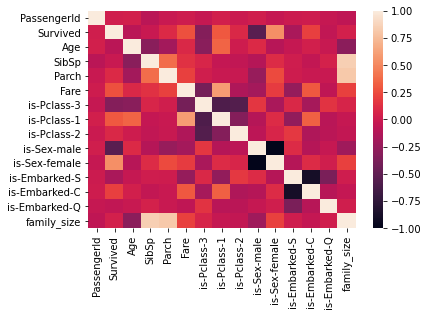

In [12]:
corr = df.corr()
sns.heatmap(corr,yticklabels=corr.columns,xticklabels = corr.columns)

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'is-Pclass-3', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Sex-female', 'is-Embarked-S', 'is-Embarked-C', 'is-Embarked-Q',
       'family_size'],
      dtype='object')

In [14]:
df = df.drop(['is-Sex-female','is-Embarked-Q'],axis = 1)

In [15]:
y = df['Survived']
X = df[['Age','Fare', 'is-Pclass-3', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size']]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1)

In [17]:
clf = [
    (LogisticRegression(),'reg-log'),
    (DecisionTreeClassifier(),'reg-tree')
]

In [18]:
for model,name in clf:
    #Train
    model.fit(X_train,y_train)
    #Metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(name)
    print('Model Results: ',round(accuracy*100,2))
    #Save
    job_file = 'modelo-'+name+'.pkl'
    joblib.dump(model,job_file)

reg-log
Model Results:  73.83
reg-tree
Model Results:  78.5


C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
